# Exercise 6-1: Support Vector Machines

In this exercise, we will be experimenting support vector machines (SVMs) on various example 2D datasets.

## Part 1: Loading and Visualizing Data

Load and visualizing the data from `ex6data1.mat`:

In [22]:

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from plot_data import plot_data

def plot_data(X, y):
    """
    Plots the data points X and y into a new figure.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training vectors, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Target values (class labels in classification).
    """
    pos = np.nonzero(y == 1)
    neg = np.nonzero(y == 0)
    plt.plot(X[pos, 0], X[pos, 1], linestyle='', marker='+', color='k')
    plt.plot(X[neg, 0], X[neg, 1], linestyle='', marker='o', color='y')
def visualize_boundary_linear(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : Support Vector Classification
        The trained SVM.
    """
    plot_data(X, y)

    coef = clf.coef_.ravel()
    intercept = clf.intercept_.ravel()

    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    yp = -1.0 * (coef[0] * xp + intercept[0]) / coef[1]

    plt.plot(xp, yp, linestyle='-', color='b')
    
import numpy as np
import matplotlib.pyplot as plt

from plot_data import plot_data


def visualize_boundary(X, y, clf):
    """
    Plots a linear decision boundary learned by the SVM.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels.
    clf : sklearn.svm.classes.SVC
        The trained SVM.
    """
    plot_data(X, y)
    x1_plot = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    x2_plot = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1_plot, x2_plot)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        X_tmp = np.hstack((X1[:, i:i + 1], X2[:, i:i + 1]))
        vals[:, i] = clf.predict(X_tmp)
    plt.contour(X1, X2, vals, levels=[0])


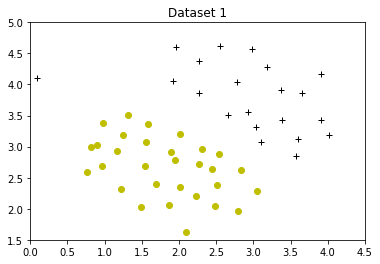

In [21]:
# Load from ex6data1
mat_data = sio.loadmat('ex6data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

## Part 2: Training Linear SVM 

In `ex6data1.mat`, most of the positive and negative examples can be seperated by a single line. Train SVM with linear kernel with C = 1 and plot the decision boundary:

score: 0.9803921568627451


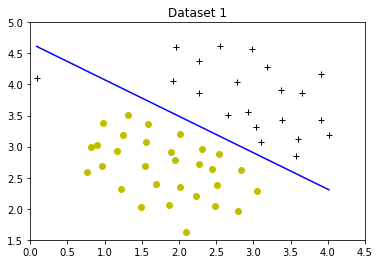

In [8]:
from sklearn import svm

from visualize_boundary_linear import visualize_boundary_linear


# Change the C value below and see how the decision boundary varies (e.g., try C = 1000).
C = 1
clf = svm.LinearSVC(C=C)
clf.fit(X, y)
print('score:', clf.score(X, y))

plt.figure()
visualize_boundary_linear(X, y, clf)
plt.xlim([0, 4.5])
plt.ylim([1.5, 5])
plt.title("Dataset 1")
plt.show()

## Part 3: Implementing Gaussian Kernel

The `gaussian_kernel()` returns the similarity between x1 and x2 using a Gaussian kernel.

In [9]:
def gaussian_kernel(x1, x2, sigma):
    """
    Returns the similarity between x1 and x2 using a Gaussian kernel.

    Parameters
    ----------
    x1 : ndarray
        Sample 1.
    x2 : ndarray
        Sample 2.
    sigma : float
        Bandwidth for Gaussian kernel.

    Returns
    -------
    float
        The similarity between x1 and x2 with bandwidth sigma.
    """
    return np.exp(-np.sum(np.square(x1 - x2)) / (2.0 * sigma ** 2))

Evaluate the Gaussian kernel:

In [11]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {}: \n\t{}\n' \
      '(for sigma = 2, this value should be about 0.324652)'.format(sigma, sim))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2: 
	0.32465246735834974
(for sigma = 2, this value should be about 0.324652)


## Part 4: Visualizing Dataset 2

Load and visualizing the data from `ex6data2.mat`:

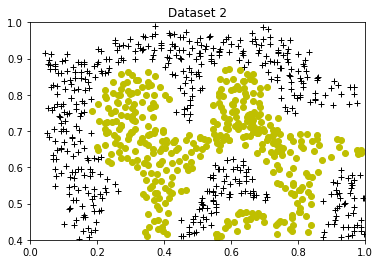

In [12]:
# Load from ex6data2
mat_data = sio.loadmat('ex6data2.mat')
X = mat_data['X']
y = mat_data['y'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 5: Training SVM with RBF Kernel (Dataset 2)

In `ex6data2.mat`, there is no linear decision boundary that separates the positive and negative examples. Train SVM with Gaussian kernel to learn a non-linear decision boundary and plot the decision boundary:

score: 0.9698725376593279


/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


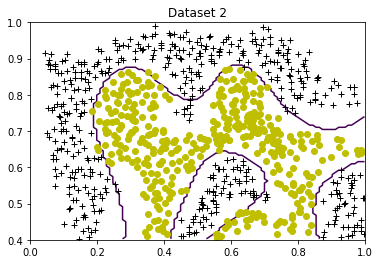

In [15]:
from visualize_boundary import visualize_boundary


# SVM Parameters
C = 100
gamma = 10

clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print('score:', clf.score(X, y))

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([0, 1])
plt.ylim([0.4, 1])
plt.title("Dataset 2")
plt.show()

## Part 6: Visualizing Dataset 3 

Load and visualizing the data from `ex6data3.mat`:

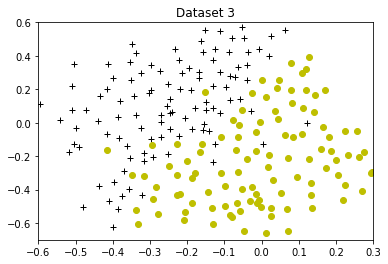

In [16]:
# Load from ex6data3
mat_data = sio.loadmat('ex6data3.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
X_val = mat_data['Xval']
y_val = mat_data['yval'].ravel()

# Plot training data
plt.figure()
plot_data(X, y)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

## Part 7: Training SVM with RBF Kernel (Dataset 3)

To find the best parameters for SVM, the `data3_params()` trys differernt combination of C and gamma and returns the best choice of them for SVM with RBF kernel.

In [17]:
def data3_params(X, y, X_val, y_val):
    """
    Returns the best choice of C and gamma for SVM with RBF kernel.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training samples, where n_samples is the number of samples and n_features is the number of features.
    y : ndarray, shape (n_samples,)
        Labels for training set.
    X_val : ndarray, shape (n_val_samples, n_features)
        Cross validation samples, where n_val_samples is the number of cross validation samples and n_features is the
        number of features.
    y_val : ndarray, shape (n_val_samples,)
        Labels for cross validation set.

    Returns
    -------
    C : float
        The best choice of penalty parameter C of the error term.
    gamma : float
        The best choice of kernel coefficient for 'rbf'.
    """
    C_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    gamma_cands = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    max_score = -1
    C_pick = -1
    gamma_pick = -1
    for C in C_cands:
        for gamma in gamma_cands:
            clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
            clf.fit(X, y)
            score = clf.score(X_val, y_val)
            if score > max_score:
                max_score = score
                C_pick = C
                gamma_pick = gamma

    return C_pick, gamma_pick

Train SVM and plot the decision boundary:

In [18]:
C, gamma = data3_params(X, y, X_val, y_val)

# Train the SVM
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma)
clf.fit(X, y)
print 'score:', clf.score(X_val, y_val)

plt.figure()
visualize_boundary(X, y, clf)
plt.xlim([-0.6, 0.3])
plt.ylim([-0.7, 0.6])
plt.title("Dataset 3")
plt.show()

SyntaxError: invalid syntax (<ipython-input-18-099ae93a7d01>, line 6)